In [1]:
import numpy as np
import pandas as pd
from visualizer.main import Visualizer

In [2]:
points1 = [(1,2),(3,4),(4,6),(10,10),(10,2)]
triangulation1 = [(0,1,4),(1,2,4),(2,3,4)]

points2 = [(0.15, 0.37), (0.32, 0.93), (0.64, 0.73), (0.77, 0.23), (0.46, 0.04), (0.18, 0.22)]
triangulation2 = [(1, 2, 5), (2, 3, 5), (3, 4, 5), (0,1,5)]

points3 = [(1,1),(10,3),(8,5),(10,6),(8,8),(10,9),(2,12),(4,10),(2,8),(4,7),(0,4),(3,2)]
triangulation3 = [(0, 1, 11), (11,10,1), (1, 2, 10), (2, 3, 9), (10,9,2), (3,4,9), (9,8,4), (8,7,4), (7,5,4), (7,6,5)]

points4 = [(0,0),(12,1),(8,3),(12,4),(9,5),(12,6),(9,8),(12,9),(0,10),(8.8,6),(1,2)]
triangulation4 = [(0, 1, 2), (0,10,2), (10,9,2), (2, 3, 4), (4,9,2), (5,4,9), (9,5,6), (6,9,8), (6,7,8)]

points5 = [(0.04277192608002693, 0.0008762265186683937),
(-0.0033571061780375833, 0.031544118675531155),
(-0.04238936424255372, 0.043339461812786056),
(-0.01777242875868275, 0.015367648087295849),
(-0.03551436424255372, 0.010312501028472323),
(-0.018437751339327915, -0.005863969559762983),
(-0.0341837190812634, -0.012604165638194359),
(-0.016885331984489202, -0.025747547991135537),
(-0.04150226746836017, -0.033498773481331616),
(-0.015554686823198882, -0.04023896955976299),
(-0.036401461016747266, -0.04799019504995907),
(-0.013115170694166622, -0.0530453421087826)]
triangulation5 = [(0, 1, 2),(3,2,0),(3,4,0),(4,5,0),(5,6,0),(6,7,0),(7,8,9),(7,9,0),(9,10,11),(9,11,0)]

points6 = [(0,0),(20,2),(8,6),(20,7),(12,11),(19,12),(0,13),(10,12),(0,10),(12,9),(0,8),(9,7),(0,6),(13,4),(1,2)]
triangulation6 = [(0, 1, 14), (14,1,13), (13,1,2), (2, 13, 12), (12,11,2), (2,3,11), (9,11,10), (11,9,3), (3,9,4),(9,8,4),(8,7,4),(7,5,4),(7,6,5)]

In [3]:
def convert_to_lines(points):
    lines = []
    for p in range(len(points)-1):
        lines.append((points[p], points[p+1]))
    lines.append((points[-1], points[0]))
    return lines

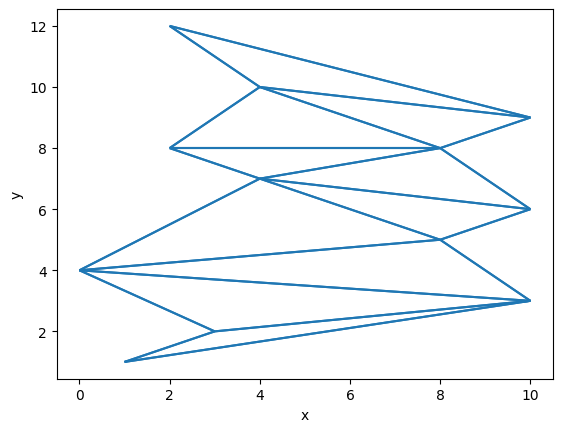

In [4]:
vis = Visualizer()
triangulation = triangulation3
points = points3
polygon = convert_to_lines(points)
vis.add_line_segment(polygon)
for triangle in triangulation:
    add = [points[triangle[0]], points[triangle[1]], points[triangle[2]]]
    lines = convert_to_lines(add)
    vis.add_line_segment(lines)
vis.show()

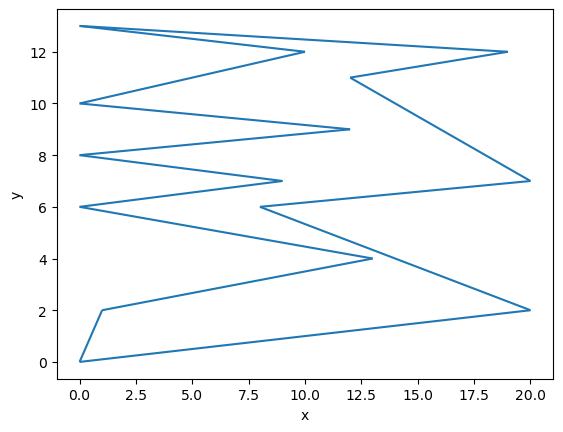

In [6]:
vis.clear()
points = convert_to_lines(points6)
vis.add_line_segment(points)
vis.show()

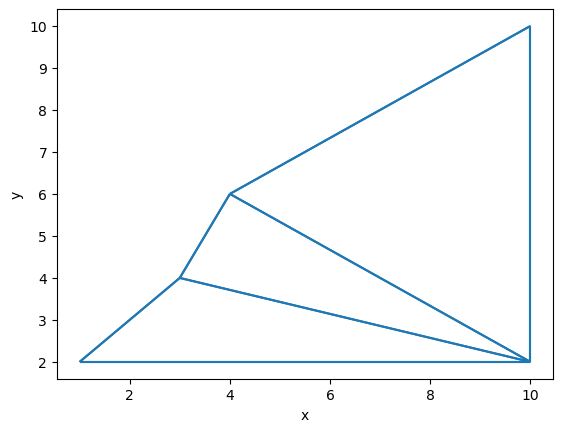

In [7]:
vis = Visualizer()
triangulation = triangulation1
points = points1
polygon = convert_to_lines(points)
vis.add_line_segment(polygon)
for triangle in triangulation:
    add = [points[triangle[0]], points[triangle[1]], points[triangle[2]]]
    lines = convert_to_lines(add)
    vis.add_line_segment(lines)
vis.show()

In [8]:
class HalfEdge:
    def __init__(self, origin, face):
        self.origin = origin
        self.face = face
        self.twin = None
        self.prev = None
        self.next = None

def connect_edges(edges):
    for i in range(len(edges)):
        edges[i].next = edges[(i + 1) % len(edges)]
    for i in range(len(edges)):
        edges[i].prev = edges[i - 1]

def twin_edges(edge1, edge2):
    edge1.twin = edge2
    edge2.twin = edge1

points1 = [(1,2),(3,4),(4,6),(10,10),(10,2)]
triangulation1 = [(0,1,4),(1,2,4),(2,3,4)]

edge1 = HalfEdge(0, 0) # 0->1
edge2 = HalfEdge(1, 0) # 1->4
edge3 = HalfEdge(4, 0) # 4->0
edge4 = HalfEdge(1, 1) # 1->2
edge5 = HalfEdge(2, 1) # 2->4
edge6 = HalfEdge(4, 1) # 4->1
edge7 = HalfEdge(2, 2) # 2->3
edge8 = HalfEdge(3, 2) # 3->4
edge9 = HalfEdge(4, 2) # 4->2

connect_edges((edge1, edge2, edge3))
connect_edges((edge4, edge5, edge6))
connect_edges((edge7, edge8, edge9))


twins = ((edge2, edge6), (edge5, edge9),)
for twin in twins:
    twin_edges(*twin)


In [9]:
class HalfEdgeGraph:
    
    def twin_edges(self, edge1, edge2):
        edge1.twin = edge2
        edge2.twin = edge1
    
    def connect_edges(self, edges):
        for i in range(len(edges)):
            edges[i].next = edges[(i + 1) % len(edges)]
        for i in range(len(edges)):
            edges[i].prev = edges[i - 1]
    
    def edges_overlapping(self, index1, index2, index3):
        edges = ((index1, index2), (index2, index3), (index3, index1))
        for edge in edges:
            if edge in self.edges:
                return True
        return False
    
    def connect_twins(self):
        original_keys = [key for key in self.edges.keys()]
        for key in original_keys:
            reversed_key = (key[1], key[0])
            if reversed_key not in self.edges:
                self.edges[reversed_key] = None
            else:
                self.twin_edges(self.edges[key], self.edges[reversed_key])
        
    def create_edges(self):
        for face_index, (index1, index2, index3) in enumerate(self.faces):
            if not self.edges_overlapping(index1, index2, index3):
                edges_vertices = ((index1, index2), (index2, index3), (index3, index1))
            else:
                edges_vertices = ((index1, index3), (index3, index2), (index2, index1))
            edges = []
            for vertex1, vertex2 in edges_vertices:
                edge = HalfEdge(vertex1, face_index)
                edges.append(edge)
                self.edges[(vertex1, vertex2)] = edge
            
            self.connect_edges(edges)
        self.connect_twins()
    
    def __init__(self, vertices, faces):
        self.vertices = vertices
        self.faces = faces
        self.edges = {}
        self.create_edges()
        
a = HalfEdgeGraph(points1, triangulation1)
b = HalfEdgeGraph(points2, triangulation2)
c = HalfEdgeGraph(points3, triangulation3)
d = HalfEdgeGraph(points4, triangulation4)
e = HalfEdgeGraph(points5, triangulation5)

In [10]:
def load_from_file(filename):
    vertices = []
    triangles = []
    with open(filename, "r") as f:
        text = f.read()
    for line in text.splitlines():
        try:
            row_type, number1, number2, number3 = line.split()
        except ValueError:
            print("Line should only contain a single character and three numbers separated by spaces")
            break
        try:
            if row_type == "v":
                vertices.append((float(number1), float(number2), float(number3)))
            elif row_type == "t":
                triangles.append((int(number1), int(number2), int(number3)))
            else:
                print("Wrong row type - it should be either 't' for triangle indices or 'v' for vertices")
                break
        except ValueError:
            print("Vertices' coordinates should be floats and triangle indices should be integers")
            break
    return vertices, triangles

print(load_from_file("triangles.txt"))

([(1.0, 4.0, 0.0), (3.0, 4.0, 0.0), (0.0, 2.0, 0.0), (2.0, 2.0, 0.0), (4.0, 2.0, 0.0), (1.0, 0.0, 0.0), (3.0, 0.0, 0.0)], [(1, 3, 4), (1, 4, 2), (2, 4, 5), (3, 6, 4), (4, 6, 7), (4, 7, 5)])


Otoczenie jednowarstwowe wierzchołka 5 - [9, 4, 6]
Otoczenie dwuwarstwowe wierzchołka 5 - [2, 3, 7, 8, 10]


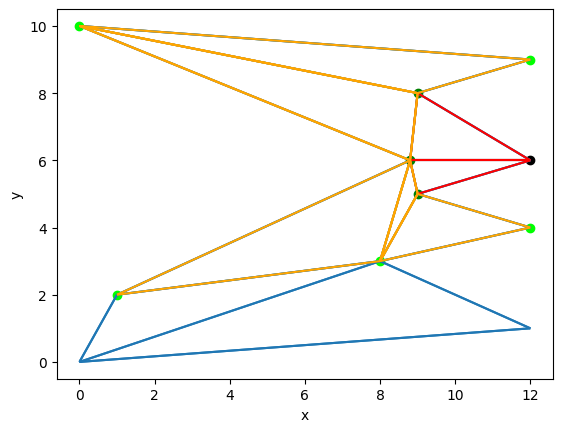

In [5]:
def find_neighbors(vertex_index, triangles):
    neighbors_one_layer = set()
    neighbors_two_layers = set()


    for triangle in triangles:
        if vertex_index in triangle:
            neighbors_one_layer.update(triangle)
            vis.add_line_segment([vertices[triangle[0]], vertices[triangle[1]]], color = 'red')
            vis.add_line_segment([vertices[triangle[0]], vertices[triangle[2]]], color = 'red')
            vis.add_line_segment([vertices[triangle[2]], vertices[triangle[1]]], color = 'red')

    neighbors_one_layer.remove(vertex_index)

    
    for neighbor in neighbors_one_layer:
        for triangle in triangles:
            if neighbor in triangle and vertex_index not in triangle:
                neighbors_two_layers.update(triangle)
                vis.add_line_segment([vertices[triangle[0]], vertices[triangle[1]]], color = 'orange')
                vis.add_line_segment([vertices[triangle[0]], vertices[triangle[2]]], color = 'orange')
                vis.add_line_segment([vertices[triangle[2]], vertices[triangle[1]]], color = 'orange')

    neighbors_two_layers -= neighbors_one_layer
    neighbors_two_layers.discard(vertex_index)

    return list(neighbors_one_layer), list(neighbors_two_layers)


vertices = points4

triangles = triangulation4

vis = Visualizer()
vis.clear()
triangulation = triangles
points = vertices
polygon = convert_to_lines(points)
vis.add_line_segment(polygon)
for triangle in triangulation:
    add = [points[triangle[0]], points[triangle[1]], points[triangle[2]]]
    lines = convert_to_lines(add)
    vis.add_line_segment(lines)

selected_vertex = 5
one_layer_neighbors, two_layers_neighbors = find_neighbors(selected_vertex, triangles)

vis.add_point(vertices[selected_vertex], color = "black")
for point in one_layer_neighbors:
    vis.add_point(vertices[point],color = "green")
for point in two_layers_neighbors:
    vis.add_point(vertices[point],color = "lime")  


vis.show()


print("Otoczenie jednowarstwowe wierzchołka", selected_vertex, "-", one_layer_neighbors)
print("Otoczenie dwuwarstwowe wierzchołka", selected_vertex, "-", two_layers_neighbors)

Otoczenie jednowarstwowe trójkąta (5, 4, 9) - [(9, 5, 6), (4, 9, 2)]
Otoczenie dwuwarstwowe trójkąta (5, 4, 9) - [(10, 9, 2), (6, 9, 8), (2, 3, 4)]


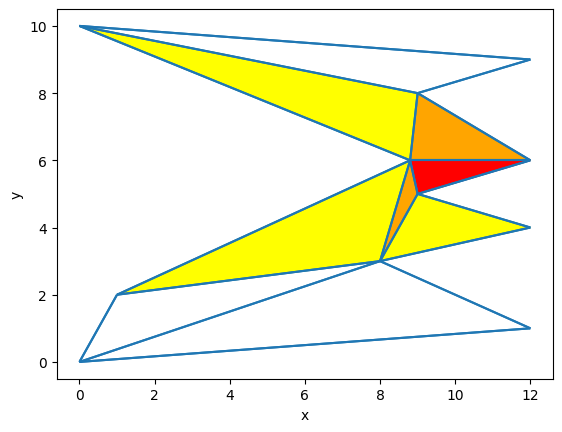

In [7]:
def are_triangles_incident(triangle1, triangle2):
    common_vertices = set(triangle1) & set(triangle2)
    return len(common_vertices) > 1


def find_triangle_neighbors(selected_triangle, triangles):
    neighbors_one_layer = set()
    neighbors_two_layers = set()

    
    for triangle in triangles:
        if selected_triangle != triangle and are_triangles_incident(selected_triangle, triangle):
            neighbors_one_layer.add(triangle)


    for neighbor_triangle in neighbors_one_layer:
        for triangle in triangles:
            if triangle != selected_triangle and triangle != neighbor_triangle and are_triangles_incident(neighbor_triangle, triangle):
                neighbors_two_layers.add(triangle)

    

    return list(neighbors_one_layer), list(neighbors_two_layers)


vertices = points4
triangles = triangulation4

selected_triangle = (5, 4, 9)
one_layer_neighbors, two_layers_neighbors = find_triangle_neighbors(selected_triangle, triangles)

vis = Visualizer()
vis.clear()
triangulation = triangles
points = vertices
polygon = convert_to_lines(points)
vis.add_line_segment(polygon)
for triangle in triangulation:
    add = [points[triangle[0]], points[triangle[1]], points[triangle[2]]]
    lines = convert_to_lines(add)
    vis.add_line_segment(lines)
current_triangle=[]
for point in selected_triangle:
    current_triangle.append(vertices[point])
vis.add_polygon(current_triangle,  color = "red")


for triangle in one_layer_neighbors:
    current_triangle=[]
    for point in triangle:
        current_triangle.append(vertices[point])
    vis.add_polygon(current_triangle,  color = "orange")


for triangle in two_layers_neighbors:
    current_triangle=[]
    for point in triangle:
        current_triangle.append(vertices[point])
    vis.add_polygon(current_triangle,  color = "yellow")

vis.show()

print("Otoczenie jednowarstwowe trójkąta", selected_triangle, "-", one_layer_neighbors)
print("Otoczenie dwuwarstwowe trójkąta", selected_triangle, "-", two_layers_neighbors)


Trójkąt zawierający punkt 2 od trójkąta (6, 7, 8) - (4, 9, 2)


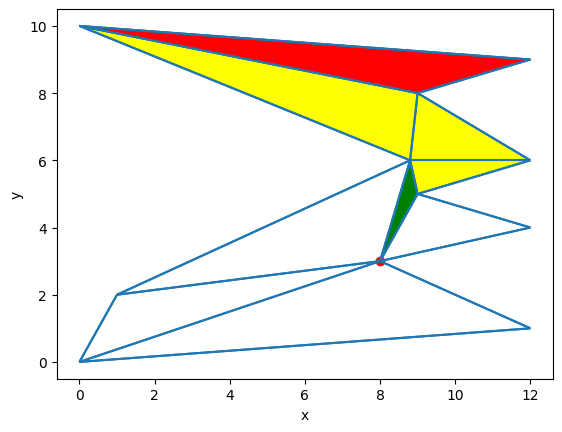

In [8]:
def are_triangles_incident(triangle1, triangle2):
    common_vertices = set(triangle1) & set(triangle2)
    return len(common_vertices) > 1


def find_triangle_containing_point(start_triangle, point, triangles):
    current_triangle = start_triangle
    visited_triangles = set()

    while current_triangle is not None:
        if current_triangle not in visited_triangles:
            visited_triangles.add(current_triangle)
            path_triangle=[]
            for current_point in list(current_triangle):
                path_triangle.append(vertices[current_point])
                vis.add_polygon(path_triangle,  color = "yellow")

            current_vertices = set(current_triangle)
            if point in current_vertices:
                return current_triangle

            incident_triangles = [triangle for triangle in triangles if are_triangles_incident(current_triangle, triangle)]
            
            unvisited_triangles = [triangle for triangle in incident_triangles if triangle not in visited_triangles]

            if unvisited_triangles:
                current_triangle = unvisited_triangles[0]
                
            else:
                break
        else:
            break

    return None

vertices = points4
triangles = triangulation4

start_triangle = (6, 7, 8)
target_point = 2



vis = Visualizer()
vis.clear()
triangulation = triangles
points = vertices
polygon = convert_to_lines(points)
vis.add_line_segment(polygon)
for triangle in triangulation:
    add = [points[triangle[0]], points[triangle[1]], points[triangle[2]]]
    lines = convert_to_lines(add)
    vis.add_line_segment(lines)


result_triangle = find_triangle_containing_point(start_triangle, target_point, triangles)

print("Trójkąt zawierający punkt", target_point, "od trójkąta", start_triangle, "-", result_triangle)


triangle=[]
for point in start_triangle:
    triangle.append(vertices[point])
vis.add_polygon(triangle,  color = "red")

triangle=[]
for point in result_triangle:
    triangle.append(vertices[point])
vis.add_polygon(triangle,  color = "green")

vis.add_point(vertices[target_point], color = "red")

vis.show()